## **Import necessary libraries**

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## **Upload Dataset**

In [3]:
data = pd.read_csv('creditcard.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst few rows:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

## **Scale the features**

In [4]:
X = data.drop('Class', axis=1)
y = data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Split the dataset**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

## **Create and train KNN classifier**

In [6]:
knn = KNeighborsClassifier(n_neighbors=3)  # Reduced neighbors due to dataset size
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

## **Create and train SVM classifier**

In [8]:
svm = SVC(kernel='rbf', class_weight='balanced')  # Balanced weights for imbalanced data
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

## **Calculate metrics for both models**


KNN Performance:
Accuracy: 0.9996
Precision: 0.9995
Recall: 0.9996
F1-Score: 0.9996


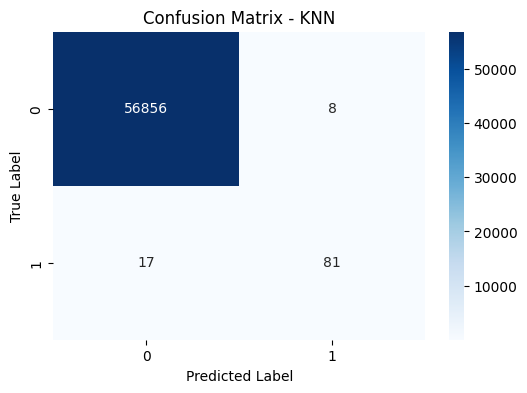


SVM Performance:
Accuracy: 0.9968
Precision: 0.9984
Recall: 0.9968
F1-Score: 0.9975


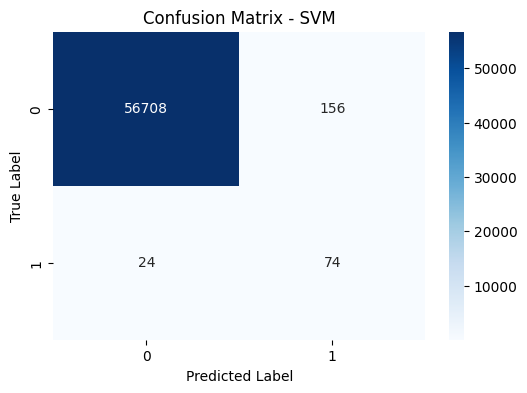

In [9]:
def print_metrics(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Print metrics for both models
print_metrics(y_test, knn_pred, "KNN")
print_metrics(y_test, svm_pred, "SVM")

## **Compare performance with visualization**


Performance Comparison:
KNN performed better based on accuracy.
KNN Accuracy: 0.9996
SVM Accuracy: 0.9968


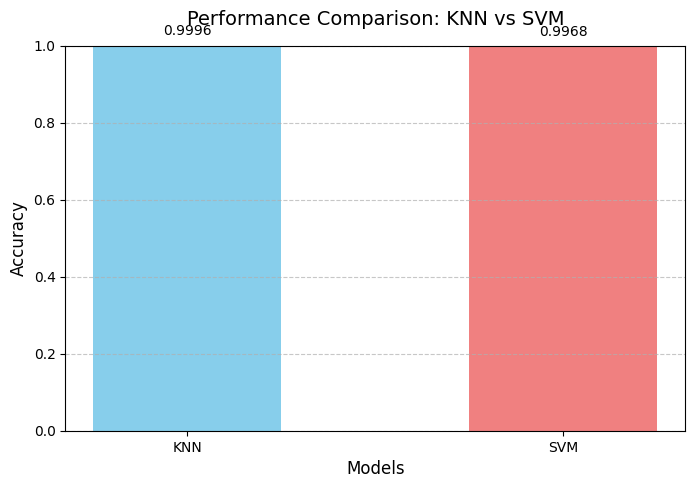

In [10]:
knn_accuracy = accuracy_score(y_test, knn_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

print("\nPerformance Comparison:")
if knn_accuracy > svm_accuracy:
    print("KNN performed better based on accuracy.")
elif svm_accuracy > knn_accuracy:
    print("SVM performed better based on accuracy.")
else:
    print("Both models performed equally based on accuracy.")
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# Visualize the comparison
models = ['KNN', 'SVM']
accuracies = [knn_accuracy, svm_accuracy]
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral'], width=0.5)
plt.title('Performance Comparison: KNN vs SVM', fontsize=14, pad=15)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.4f}',
             ha='center', va='bottom', fontsize=10)
plt.show()

# **Task 2: Bonus Task - Predicting Customer Churn**

In [26]:
loan_data = pd.read_csv("loan_data.csv")
print("Dataset Info:")
print(loan_data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [27]:
print("\nMissing Values:")
print(loan_data.isnull().sum())


Missing Values:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [28]:
print("\nFirst 5 Rows:")
print(loan_data.head())


First 5 Rows:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2    

In [29]:
# Handle missing values
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median(), inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)

<ipython-input-29-3403a7e7c68e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
<ipython-input-29-3403a7e7c68e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [32]:
# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    loan_data[col] = le.fit_transform(loan_data[col])

In [33]:
# Features and target
X = loan_data.drop(['Loan_ID', 'Loan_Status'], axis=1)  # Drop Loan_ID as it’s not predictive
y = loan_data['Loan_Status']  # 1 = Y (approved), 0 = N (not approved)

In [34]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [36]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [37]:
# Metrics
print("\nKNN Performance for Loan Approval Prediction:")
print(f"Accuracy: {accuracy_score(y_test, knn_pred):.4f}")
print(f"Precision: {precision_score(y_test, knn_pred):.4f}")
print(f"Recall: {recall_score(y_test, knn_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, knn_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred))


KNN Performance for Loan Approval Prediction:
Accuracy: 0.8211
Precision: 0.8316
Recall: 0.9294
F1-Score: 0.8778
Confusion Matrix:
[[22 16]
 [ 6 79]]


In [38]:
# SVM model
svm = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [39]:
# Metrics for SVM
print("\nSVM Performance for Loan Approval Prediction:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.4f}")
print(f"Precision: {precision_score(y_test, svm_pred):.4f}")
print(f"Recall: {recall_score(y_test, svm_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, svm_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))


SVM Performance for Loan Approval Prediction:
Accuracy: 0.8293
Precision: 0.8404
Recall: 0.9294
F1-Score: 0.8827
Confusion Matrix:
[[23 15]
 [ 6 79]]


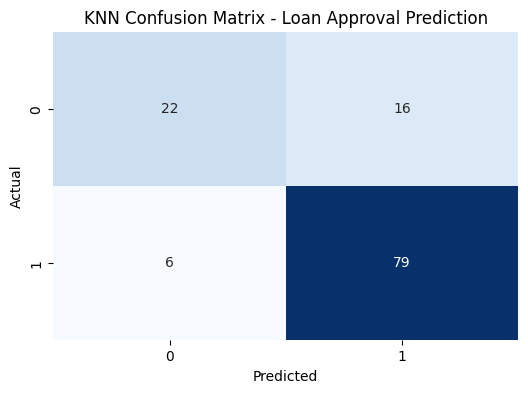

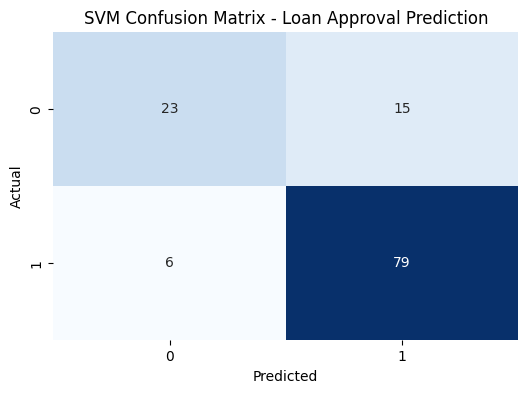

In [41]:
# KNN Confusion Matrix
plt.figure(figsize=(6, 4))
cm_knn = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix - Loan Approval Prediction')
plt.show()

# SVM Confusion Matrix
plt.figure(figsize=(6, 4))
cm_svm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix - Loan Approval Prediction')
plt.show()